In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import meerkat as mk
%load_ext autoreload
%autoreload 2

In [20]:
IMAGE_COLUMN = "img"
EMBED_COLUMN = "img_clip"

df = mk.get("imagenette", version="160px")
df = df[100:150]

# Embed the image.
df = mk.embed(df, input=IMAGE_COLUMN, out_col=EMBED_COLUMN)

with mk.gui.react():
    # Match
    match = mk.gui.Match(
        df=df,
        against=EMBED_COLUMN,
        title="Search Examples",
    )
    examples_df = match(df)[0]

    # Sort
    df_sorted = mk.sort(data=examples_df, by=match.criterion.name, ascending=False)[0]

100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


In [21]:
def build_networkx_graph(root_nodes):
    G = nx.Graph()
    seen_nodes = {}
    while root_nodes:
        node = root_nodes.pop(0)
        if node in seen_nodes:
            continue
        seen_nodes |= {node}
        G.add_node(node)
        for child in node.trigger_children:
            G.add_node(child)
            G.add_edge(node, child)

print(examples_df)
build_networkx_graph(examples_df.node)


DataFrame(nrows: 50, ncols: 16)


AttributeError: 'ProvenanceObjNode' object has no attribute 'pop'

In [23]:
x = lambda: print("hi")

print(x.__name__)

<lambda>


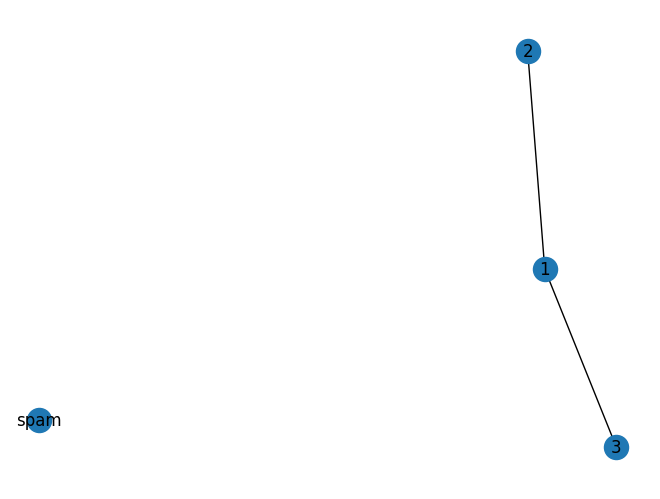

In [12]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
# G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
# G.add_edge(3, 'm')

nx.draw(G, with_labels=True)
plt.show()